In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# load data
dataset = pd.read_csv("data_with_label.csv")
dataset.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,52,53,54,55,56,57,58,59,60,label
0,0,300.28,300.30,300.32,300.33,300.35,300.37,300.39,300.41,300.43,...,-20.0,-22.0,-24.0,-14.0,-13.0,-5.0,-21.0,-10.0,226.13,HL
1,1,300.30,300.32,300.33,300.35,300.37,300.39,300.41,300.43,300.44,...,-22.0,-24.0,-14.0,-13.0,-5.0,-21.0,-10.0,-19.0,176.56,ML
2,2,300.32,300.33,300.35,300.37,300.39,300.41,300.43,300.44,300.46,...,-24.0,-14.0,-13.0,-5.0,-21.0,-10.0,-19.0,-1.0,150.94,ML
3,3,300.33,300.35,300.37,300.39,300.41,300.43,300.44,300.46,300.48,...,-14.0,-13.0,-5.0,-21.0,-10.0,-19.0,-1.0,-9.0,106.40,ML
4,4,300.35,300.37,300.39,300.41,300.43,300.44,300.46,300.48,300.50,...,-13.0,-5.0,-21.0,-10.0,-19.0,-1.0,-9.0,8.0,115.58,ML


In [84]:
# Input and Output features
y=dataset.label
X = dataset.drop(["0","label"], axis=1)
#X = dataset.iloc[:,1:6].values
#y = dataset['label'].values
#print(y)

In [85]:
def normalize(X):
    """Normalize the given dataset X
 Args:
 X: ndarray, dataset

 Returns:
 (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
 with mean 0 and standard deviation 1; mean and std are the
 mean and standard deviation respectively.

 Note:
 You will encounter dimensions where the standard deviation is
 zero, for those when you do normalization the normalized data
 will be NaN. Handle this by setting using `std = 1` for those
 dimensions when doing normalization.
 """
    mu = np.mean(X, axis=0) # <-- Q1: Compute the mean of X
    std = np.std(X, axis=0)# <-- Q2: Compute the std of X
    std_filled = std.copy()
    std_filled[std==0] = 1
    Xbar = (X-mu)/std_filled
     # <-- Q3: Compute the normalized data Xbar
    

    return Xbar, mu, std 

In [86]:
X, mu, std = normalize(X)

In [87]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=24)

In [183]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=24)

In [184]:
results = {}

Accuracy: 0.9243697478991597
Report: 
              precision    recall  f1-score   support

          HL       0.95      0.95      0.95        73
          LL       0.88      0.77      0.82        30
          ML       0.92      0.97      0.94       102
         VHL       0.92      0.92      0.92        24
         VLL       1.00      0.78      0.88         9

    accuracy                           0.92       238
   macro avg       0.93      0.88      0.90       238
weighted avg       0.92      0.92      0.92       238



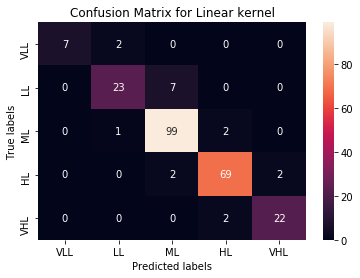

In [195]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='linear', random_state=1)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
results['linear'] = accuracy_score(y_test, y_pred)
print("Report: ")
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt     
my_tags = ["VLL", "LL","ML","HL","VHL"]
cm = confusion_matrix(y_test, y_pred, my_tags)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Linear kernel'); 
ax.xaxis.set_ticklabels(my_tags); ax.yaxis.set_ticklabels(my_tags);

Accuracy: 0.8151260504201681
Report: 
              precision    recall  f1-score   support

          HL       0.80      0.86      0.83        73
          LL       0.76      0.63      0.69        30
          ML       0.82      0.91      0.87       102
         VHL       0.88      0.62      0.73        24
         VLL       1.00      0.44      0.62         9

    accuracy                           0.82       238
   macro avg       0.85      0.70      0.75       238
weighted avg       0.82      0.82      0.81       238



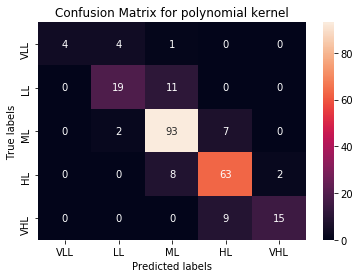

In [196]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel='poly', C=21, gamma=0.0111111, random_state=1)#21 0.011111111111
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
results['poly'] = accuracy_score(y_test, y_pred)
print("Report: ")
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt     
my_tags = ["VLL", "LL","ML","HL","VHL"]
cm = confusion_matrix(y_test, y_pred, my_tags)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for polynomial kernel'); 
ax.xaxis.set_ticklabels(my_tags); ax.yaxis.set_ticklabels(my_tags);

Accuracy: 0.9369747899159664
Report: 
              precision    recall  f1-score   support

          HL       0.93      0.96      0.95        73
          LL       0.90      0.87      0.88        30
          ML       0.95      0.98      0.97       102
         VHL       0.91      0.83      0.87        24
         VLL       1.00      0.78      0.88         9

    accuracy                           0.94       238
   macro avg       0.94      0.88      0.91       238
weighted avg       0.94      0.94      0.94       238



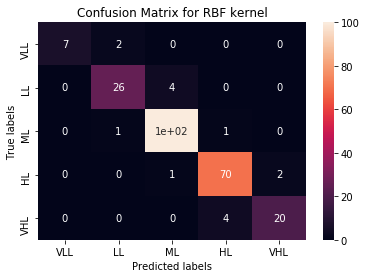

In [200]:
## from sklearn.svm import SVC
svcclassifier = SVC(kernel='rbf', C=13900, gamma=0.0001, random_state=1)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
results['rbf'] = accuracy_score(y_test, y_pred)
print("Report: ")
print(classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt     
my_tags = ["VLL", "LL","ML","HL","VHL"]
cm = confusion_matrix(y_test, y_pred, my_tags)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RBF kernel'); 
ax.xaxis.set_ticklabels(my_tags); ax.yaxis.set_ticklabels(my_tags);

In [198]:
print(results)

{'linear': 0.9243697478991597, 'poly': 0.8151260504201681, 'rbf': 0.9369747899159664}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
param_grid = [{'kernel': ['linear']}, {'kernel': ['poly', 'rbf'], 'C': [0.1, 1,100, 1000],
'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}]
print("Total length to check for best model and parameters: ",len(list(ParameterGrid(param_grid))))
gsc = GridSearchCV(SVC(),param_grid,scoring='accuracy',cv=5)
grid_result = gsc.fit(X_train, y_train)
print("Best Parameters: ", grid_result.best_params_)
print("Best Estimator: ", grid_result.best_estimator_)
print("Best Score: ", grid_result.best_score_)
y_pred = grid_result.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# results['rbf'] = accuracy_score(y_test, y_pred)
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Total length to check for best model and parameters:  57
